In [103]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [104]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [105]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [106]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [107]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [108]:
import requests
requests.__version__

'2.24.0'

In [109]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [110]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9


In [111]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9&q=Boston


In [112]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [429]>

In [113]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [429]>

In [114]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [429]>

In [115]:
# Get the text of the 'Get' request.
city_weather.text

'{"cod":429, "message": "Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price"}'

In [116]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [117]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [118]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [119]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9&q=Bston


In [120]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [121]:
# Get the JSON data.
boston_data = city_weather.json()

In [122]:
boston_data["sys"]["country"]

KeyError: 'sys'

In [123]:
boston_data["dt"]

KeyError: 'dt'

In [22]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 48.99 61 1 10.36


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-03-23 01:43:19'

In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | ushuaia
Processing Record 2 of Set 13 | kloulklubed
Processing Record 3 of Set 13 | katsuura
Processing Record 4 of Set 13 | ende
Processing Record 5 of Set 13 | preobrazheniye
Processing Record 6 of Set 13 | padang
Processing Record 7 of Set 13 | cayenne
Processing Record 8 of Set 13 | high prairie
Processing Record 9 of Set 13 | arraial do cabo
Processing Record 10 of Set 13 | samusu
City not found. Skipping...
Processing Record 11 of Set 13 | busselton
Processing Record 12 of Set 13 | mataura
Processing Record 13 of Set 13 | sobolevo
Processing Record 14 of Set 13 | podor
Processing Record 15 of Set 13 | thompson
Processing Record 16 of Set 13 | bethel
Processing Record 17 of Set 13 | lebu
Processing Record 18 of Set 13 | hermanus
Processing Record 19 of Set 13 | kavieng
Processing Record 20 of Set 13 | senador jose porfirio
Processing Record 21 of Set 13 | albany
Processing Record 22 of Set 

Processing Record 35 of Set 16 | charlestown
Processing Record 36 of Set 16 | walvis bay
Processing Record 37 of Set 16 | pangnirtung
Processing Record 38 of Set 16 | biak
Processing Record 39 of Set 16 | cape town
Processing Record 40 of Set 16 | miri
Processing Record 41 of Set 16 | kodiak
Processing Record 42 of Set 16 | saint-francois
Processing Record 43 of Set 16 | iquique
Processing Record 44 of Set 16 | airai
Processing Record 45 of Set 16 | bredasdorp
Processing Record 46 of Set 16 | haines junction
Processing Record 47 of Set 16 | youghal
Processing Record 48 of Set 16 | qurbus
Processing Record 49 of Set 16 | namibe
Processing Record 50 of Set 16 | liverpool
Processing Record 1 of Set 17 | ivanovka
Processing Record 2 of Set 17 | cockburn harbour
City not found. Skipping...
Processing Record 3 of Set 17 | kohlu
Processing Record 4 of Set 17 | hammerfest
Processing Record 5 of Set 17 | matagami
Processing Record 6 of Set 17 | amderma
City not found. Skipping...
Processing Rec

Processing Record 21 of Set 20 | wanning
Processing Record 22 of Set 20 | dillon
Processing Record 23 of Set 20 | chitipa
Processing Record 24 of Set 20 | faya
Processing Record 25 of Set 20 | nouakchott
Processing Record 26 of Set 20 | san miguel
Processing Record 27 of Set 20 | hobyo
Processing Record 28 of Set 20 | ardakan
Processing Record 29 of Set 20 | semey
Processing Record 30 of Set 20 | margate
Processing Record 31 of Set 20 | finschhafen
Processing Record 32 of Set 20 | galveston
Processing Record 33 of Set 20 | ambikapur
Processing Record 34 of Set 20 | djenne
Processing Record 35 of Set 20 | saleaula
City not found. Skipping...
Processing Record 36 of Set 20 | port lincoln
Processing Record 37 of Set 20 | osinovo
Processing Record 38 of Set 20 | shizunai
Processing Record 39 of Set 20 | brewster
Processing Record 40 of Set 20 | mecca
Processing Record 41 of Set 20 | port hedland
Processing Record 42 of Set 20 | porosozero
Processing Record 43 of Set 20 | kurkent
Processing

Processing Record 8 of Set 24 | zhigansk
Processing Record 9 of Set 24 | mahajanga
Processing Record 10 of Set 24 | riyadh
Processing Record 11 of Set 24 | salamanca
Processing Record 12 of Set 24 | alto araguaia
Processing Record 13 of Set 24 | pustoshka
Processing Record 14 of Set 24 | kyshtovka
Processing Record 15 of Set 24 | hambantota
Processing Record 16 of Set 24 | nyuksenitsa
Processing Record 17 of Set 24 | tshikapa
Processing Record 18 of Set 24 | malwan
City not found. Skipping...
Processing Record 19 of Set 24 | khorixas
Processing Record 20 of Set 24 | lavrentiya
Processing Record 21 of Set 24 | magadan
Processing Record 22 of Set 24 | coquimbo
Processing Record 23 of Set 24 | qaqortoq
Processing Record 24 of Set 24 | nyrob
Processing Record 25 of Set 24 | pahrump
Processing Record 26 of Set 24 | fairbanks
Processing Record 27 of Set 24 | vardo
Processing Record 28 of Set 24 | ouro preto
Processing Record 29 of Set 24 | lashio
Processing Record 30 of Set 24 | ossora
Proce

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,50.00,66,20,18.41,AR,2021-03-23 01:48:03
1,Kloulklubed,7.0419,134.2556,84.20,79,75,17.27,PW,2021-03-23 01:48:04
2,Katsuura,35.1333,140.3000,55.99,46,20,6.91,JP,2021-03-23 01:48:04
3,Ende,-8.8432,121.6623,83.68,74,100,1.59,ID,2021-03-23 01:48:04
4,Preobrazheniye,42.9019,133.9064,40.35,63,98,9.95,RU,2021-03-23 01:48:04
5,Padang,-0.9492,100.3543,78.80,83,40,2.30,ID,2021-03-23 01:48:05
6,Cayenne,4.9333,-52.3333,77.00,94,75,8.05,GF,2021-03-23 01:47:44
7,High Prairie,55.4334,-116.4858,21.20,73,92,5.75,CA,2021-03-23 01:48:05
8,Arraial Do Cabo,-22.9661,-42.0278,76.32,85,23,4.85,BR,2021-03-23 01:48:05
9,Busselton,-33.6500,115.3333,63.00,62,56,1.01,AU,2021-03-23 01:47:39


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [28]:
city_data_df =city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-03-23 01:48:03,-54.8000,-68.3000,50.00,66,20,18.41
1,Kloulklubed,PW,2021-03-23 01:48:04,7.0419,134.2556,84.20,79,75,17.27
2,Katsuura,JP,2021-03-23 01:48:04,35.1333,140.3000,55.99,46,20,6.91
3,Ende,ID,2021-03-23 01:48:04,-8.8432,121.6623,83.68,74,100,1.59
4,Preobrazheniye,RU,2021-03-23 01:48:04,42.9019,133.9064,40.35,63,98,9.95
5,Padang,ID,2021-03-23 01:48:05,-0.9492,100.3543,78.80,83,40,2.30
6,Cayenne,GF,2021-03-23 01:47:44,4.9333,-52.3333,77.00,94,75,8.05
7,High Prairie,CA,2021-03-23 01:48:05,55.4334,-116.4858,21.20,73,92,5.75
8,Arraial Do Cabo,BR,2021-03-23 01:48:05,-22.9661,-42.0278,76.32,85,23,4.85
9,Busselton,AU,2021-03-23 01:47:39,-33.6500,115.3333,63.00,62,56,1.01


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

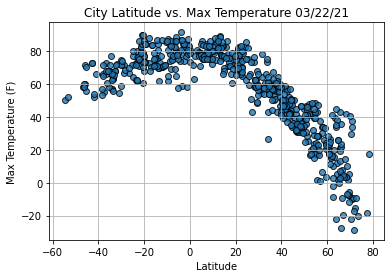

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

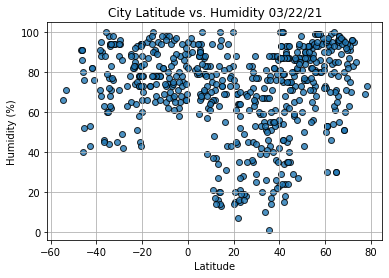

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

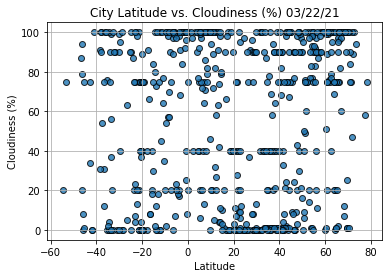

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

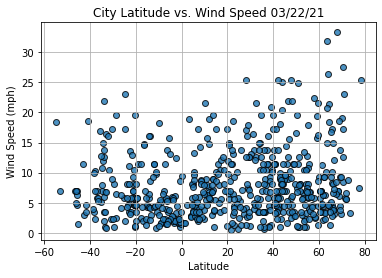

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
 

In [37]:
index13 = city_data_df.loc[13]
index13

City                     Thompson
Country                        CA
Date          2021-03-23 01:48:03
Lat                       55.7435
Lng                      -97.8558
Max Temp                     17.6
Humidity                       62
Cloudiness                     90
Wind Speed                   11.5
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
580     True
581     True
582     True
583     True
584     True
Name: Lat, Length: 585, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kloulklubed,PW,2021-03-23 01:48:04,7.0419,134.2556,84.20,79,75,17.27
2,Katsuura,JP,2021-03-23 01:48:04,35.1333,140.3000,55.99,46,20,6.91
4,Preobrazheniye,RU,2021-03-23 01:48:04,42.9019,133.9064,40.35,63,98,9.95
6,Cayenne,GF,2021-03-23 01:47:44,4.9333,-52.3333,77.00,94,75,8.05
7,High Prairie,CA,2021-03-23 01:48:05,55.4334,-116.4858,21.20,73,92,5.75


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

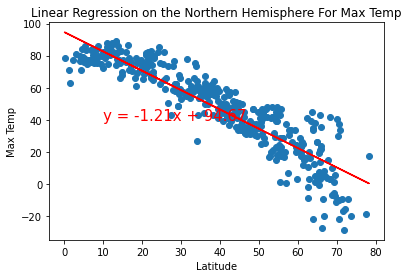

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For Max Temp")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


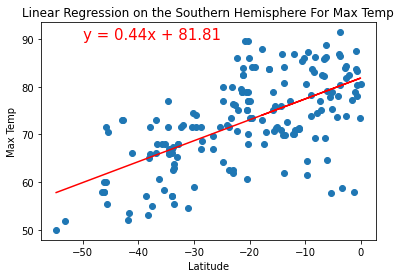

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For Max Temp")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

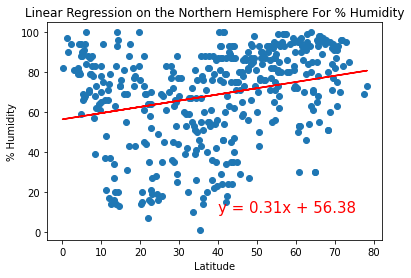

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

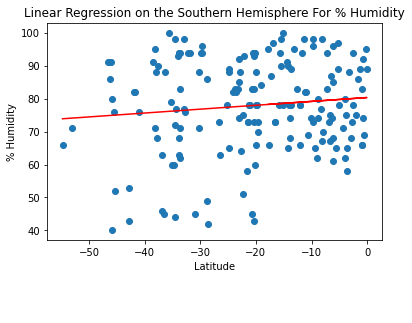

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

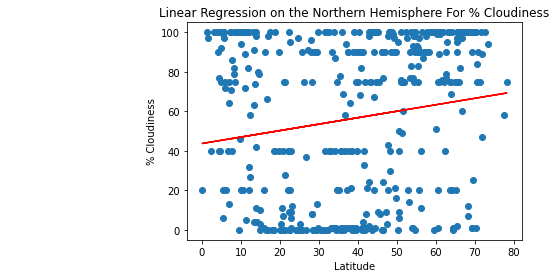

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

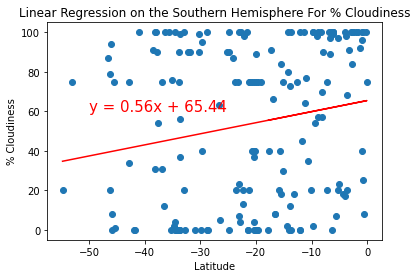

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

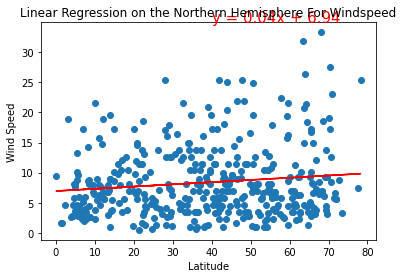

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For Windspeed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

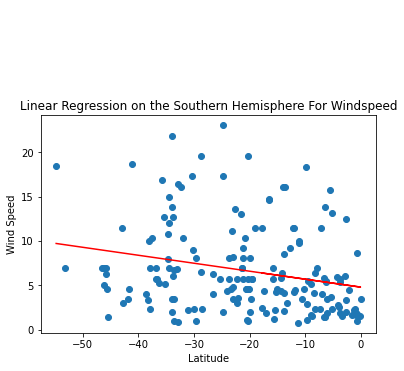

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For Windspeed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [49]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [50]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Ushuaia,AR,2021-03-23 01:48:03,-54.8000,-68.3000,50.00,66,20,18.41
1,1,Kloulklubed,PW,2021-03-23 01:48:04,7.0419,134.2556,84.20,79,75,17.27
2,2,Katsuura,JP,2021-03-23 01:48:04,35.1333,140.3000,55.99,46,20,6.91
3,3,Ende,ID,2021-03-23 01:48:04,-8.8432,121.6623,83.68,74,100,1.59
4,4,Preobrazheniye,RU,2021-03-23 01:48:04,42.9019,133.9064,40.35,63,98,9.95


In [51]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [52]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [53]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

In [56]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [61]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Kloulklubed,PW,2021-03-23 01:48:04,7.0419,134.2556,84.20,79,75,17.27
3,3,Ende,ID,2021-03-23 01:48:04,-8.8432,121.6623,83.68,74,100,1.59
5,5,Padang,ID,2021-03-23 01:48:05,-0.9492,100.3543,78.80,83,40,2.30
6,6,Cayenne,GF,2021-03-23 01:47:44,4.9333,-52.3333,77.00,94,75,8.05
8,8,Arraial Do Cabo,BR,2021-03-23 01:48:05,-22.9661,-42.0278,76.32,85,23,4.85
17,17,Kavieng,PG,2021-03-23 01:48:08,-2.5744,150.7967,81.79,78,100,12.44
20,20,Vaini,TO,2021-03-23 01:48:08,-21.2000,-175.2000,82.40,78,75,8.05
22,22,Jashpurnagar,IN,2021-03-23 01:48:09,22.9000,84.1500,79.59,15,6,4.43
23,23,Rikitea,PF,2021-03-23 01:47:20,-23.1203,-134.9692,79.99,74,7,11.14
26,26,Omboue,GA,2021-03-23 01:48:10,-1.5746,9.2618,77.23,86,100,1.68


In [66]:
preferred_cities_df.count()

City_ID       162
City          162
Country       162
Date          162
Lat           162
Lng           162
Max Temp      162
Humidity      162
Cloudiness    162
Wind Speed    162
dtype: int64

In [67]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Kloulklubed,PW,84.20,7.0419,134.2556,
3,Ende,ID,83.68,-8.8432,121.6623,
5,Padang,ID,78.80,-0.9492,100.3543,
6,Cayenne,GF,77.00,4.9333,-52.3333,
8,Arraial Do Cabo,BR,76.32,-22.9661,-42.0278,
17,Kavieng,PG,81.79,-2.5744,150.7967,
20,Vaini,TO,82.40,-21.2000,-175.2000,
22,Jashpurnagar,IN,79.59,22.9000,84.1500,
23,Rikitea,PF,79.99,-23.1203,-134.9692,
26,Omboue,GA,77.23,-1.5746,9.2618,


In [68]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [92]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import g_key

In [70]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'ATtYBwIEUP1b1JV_Dad-H0PjKf2On5V7ZGkUWMukaoKWJy7qjfVJo5_Ri3TzaaRDVVvDGP3PMl8Yq4CedH41UGPp21tJWfHxniBTcXuT_NGI3Ej01W5CYpEb6I15Kr9cAs5fI5mgNCfYQ3720q8HgKjhW04HDwml6ir9Iqmrn5498OfkVJV4Gxsv9iswoELiAN7VnV2KsgiMEiKaEtuTMyRMccgfyJl8vqC56a3GaZZJwzvpAHNLxZb8jQ0WDfuyB4xJ9A16EUM66kteRjk5fy47VB9vnHyBCDXy6R-_C0ZOcr3XHTsXgG6bl6yeGlzf1VrUW-q4Yl4gOBhLpuN8IDdNGAtbQjT9qQMoPIAC6buaR0Sh15utDSLkDwoQvexr9ML3LuUou_nnB2kC80oSYl6DBzPAje5ZCRaa9K8Xa35Sbryl2HB8x9IMXyVi',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594393802915,
      'lng': 2.354352980291503},
     'southwest': {'lat': 48.8567414197085, 'lng': 2.351655019708499}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'name': 'Hôtel Duo',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 3840,
     'html_attributions': ['<a href="https://

In [71]:
len(hotels["results"])

20

In [73]:
hotels["results"][0]["name"]

'Hôtel Duo'

In [82]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
# Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError):
    print("Hotel not found... skipping.")

In [102]:
hotel_df

NameError: name 'hotel_df' is not defined

In [88]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [94]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [95]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))